In [18]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Задание 1.1
data = pd.read_csv('/content/drive/My Drive/КР/КР/Churn.csv')

In [20]:
# Задание 1.2
data.head()

State  Account length  ...  Customer service calls  Churn
0    KS             128  ...                       1  False
1    OH             107  ...                       1  False
2    NJ             137  ...                       0  False
3    OH              84  ...                       2  False
4    OK              75  ...                       3  False

[5 rows x 20 columns]

In [21]:
#Задание 1.3
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [22]:
# Задание 1.4
data.shape

(3333, 20)

In [23]:
# Задание 1.5
data.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [24]:
# Задание 1.6
data = data.astype({'Churn':int})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
State                     3333 non-null object
Account length            3333 non-null int64
Area code                 3333 non-null int64
International plan        3333 non-null object
Voice mail plan           3333 non-null object
Number vmail messages     3333 non-null int64
Total day minutes         3333 non-null float64
Total day calls           3333 non-null int64
Total day charge          3333 non-null float64
Total eve minutes         3333 non-null float64
Total eve calls           3333 non-null int64
Total eve charge          3333 non-null float64
Total night minutes       3333 non-null float64
Total night calls         3333 non-null int64
Total night charge        3333 non-null float64
Total intl minutes        3333 non-null float64
Total intl calls          3333 non-null int64
Total intl charge         3333 non-null float64
Customer service calls    3333 non-null int64


In [41]:
# Задание 1.7
data0 = data.sort_values(by='Total eve minutes')
data0.head()

State  Account length  ...  Customer service calls Churn
2932    UT              97  ...                       1     0
32      LA             172  ...                       3     0
533     OK             125  ...                       1     0
889     MN             103  ...                       0     0
821     MN              80  ...                       0     0

[5 rows x 20 columns]

In [26]:
# Задание 1.8
data1 = data.loc[data['Churn']==0]
data1.mean()

Account length            100.793684
Area code                 437.074737
Number vmail messages       8.604561
Total day minutes         175.175754
Total day calls           100.283158
Total day charge           29.780421
Total eve minutes         199.043298
Total eve calls           100.038596
Total eve charge           16.918909
Total night minutes       200.133193
Total night calls         100.058246
Total night charge          9.006074
Total intl minutes         10.158877
Total intl calls            4.532982
Total intl charge           2.743404
Customer service calls      1.449825
Churn                       0.000000
dtype: float64

In [27]:
# Задание 1.9
data1['Total day calls'].mean()

100.28315789473685

In [28]:
# Задание 1.10
data2=data.groupby(['Total night minutes']).mean()

data2.head()

Account length  Area code  ...  Customer service calls  Churn
Total night minutes                             ...                               
23.2                           76.0      415.0  ...                     3.0    0.0
43.7                          152.0      415.0  ...                     1.0    0.0
45.0                           42.0      408.0  ...                     1.0    0.0
47.4                          146.0      510.0  ...                     4.0    1.0
50.1                          143.5      411.5  ...                     1.5    0.0

[5 rows x 16 columns]

In [0]:
import seaborn as sns
import matplotlib as plt

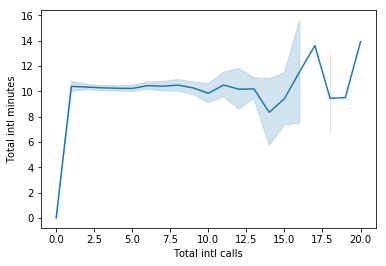

In [43]:
# Задание 2.1
sns.lineplot(y = data['Total intl minutes'], x = data['Total intl calls'])

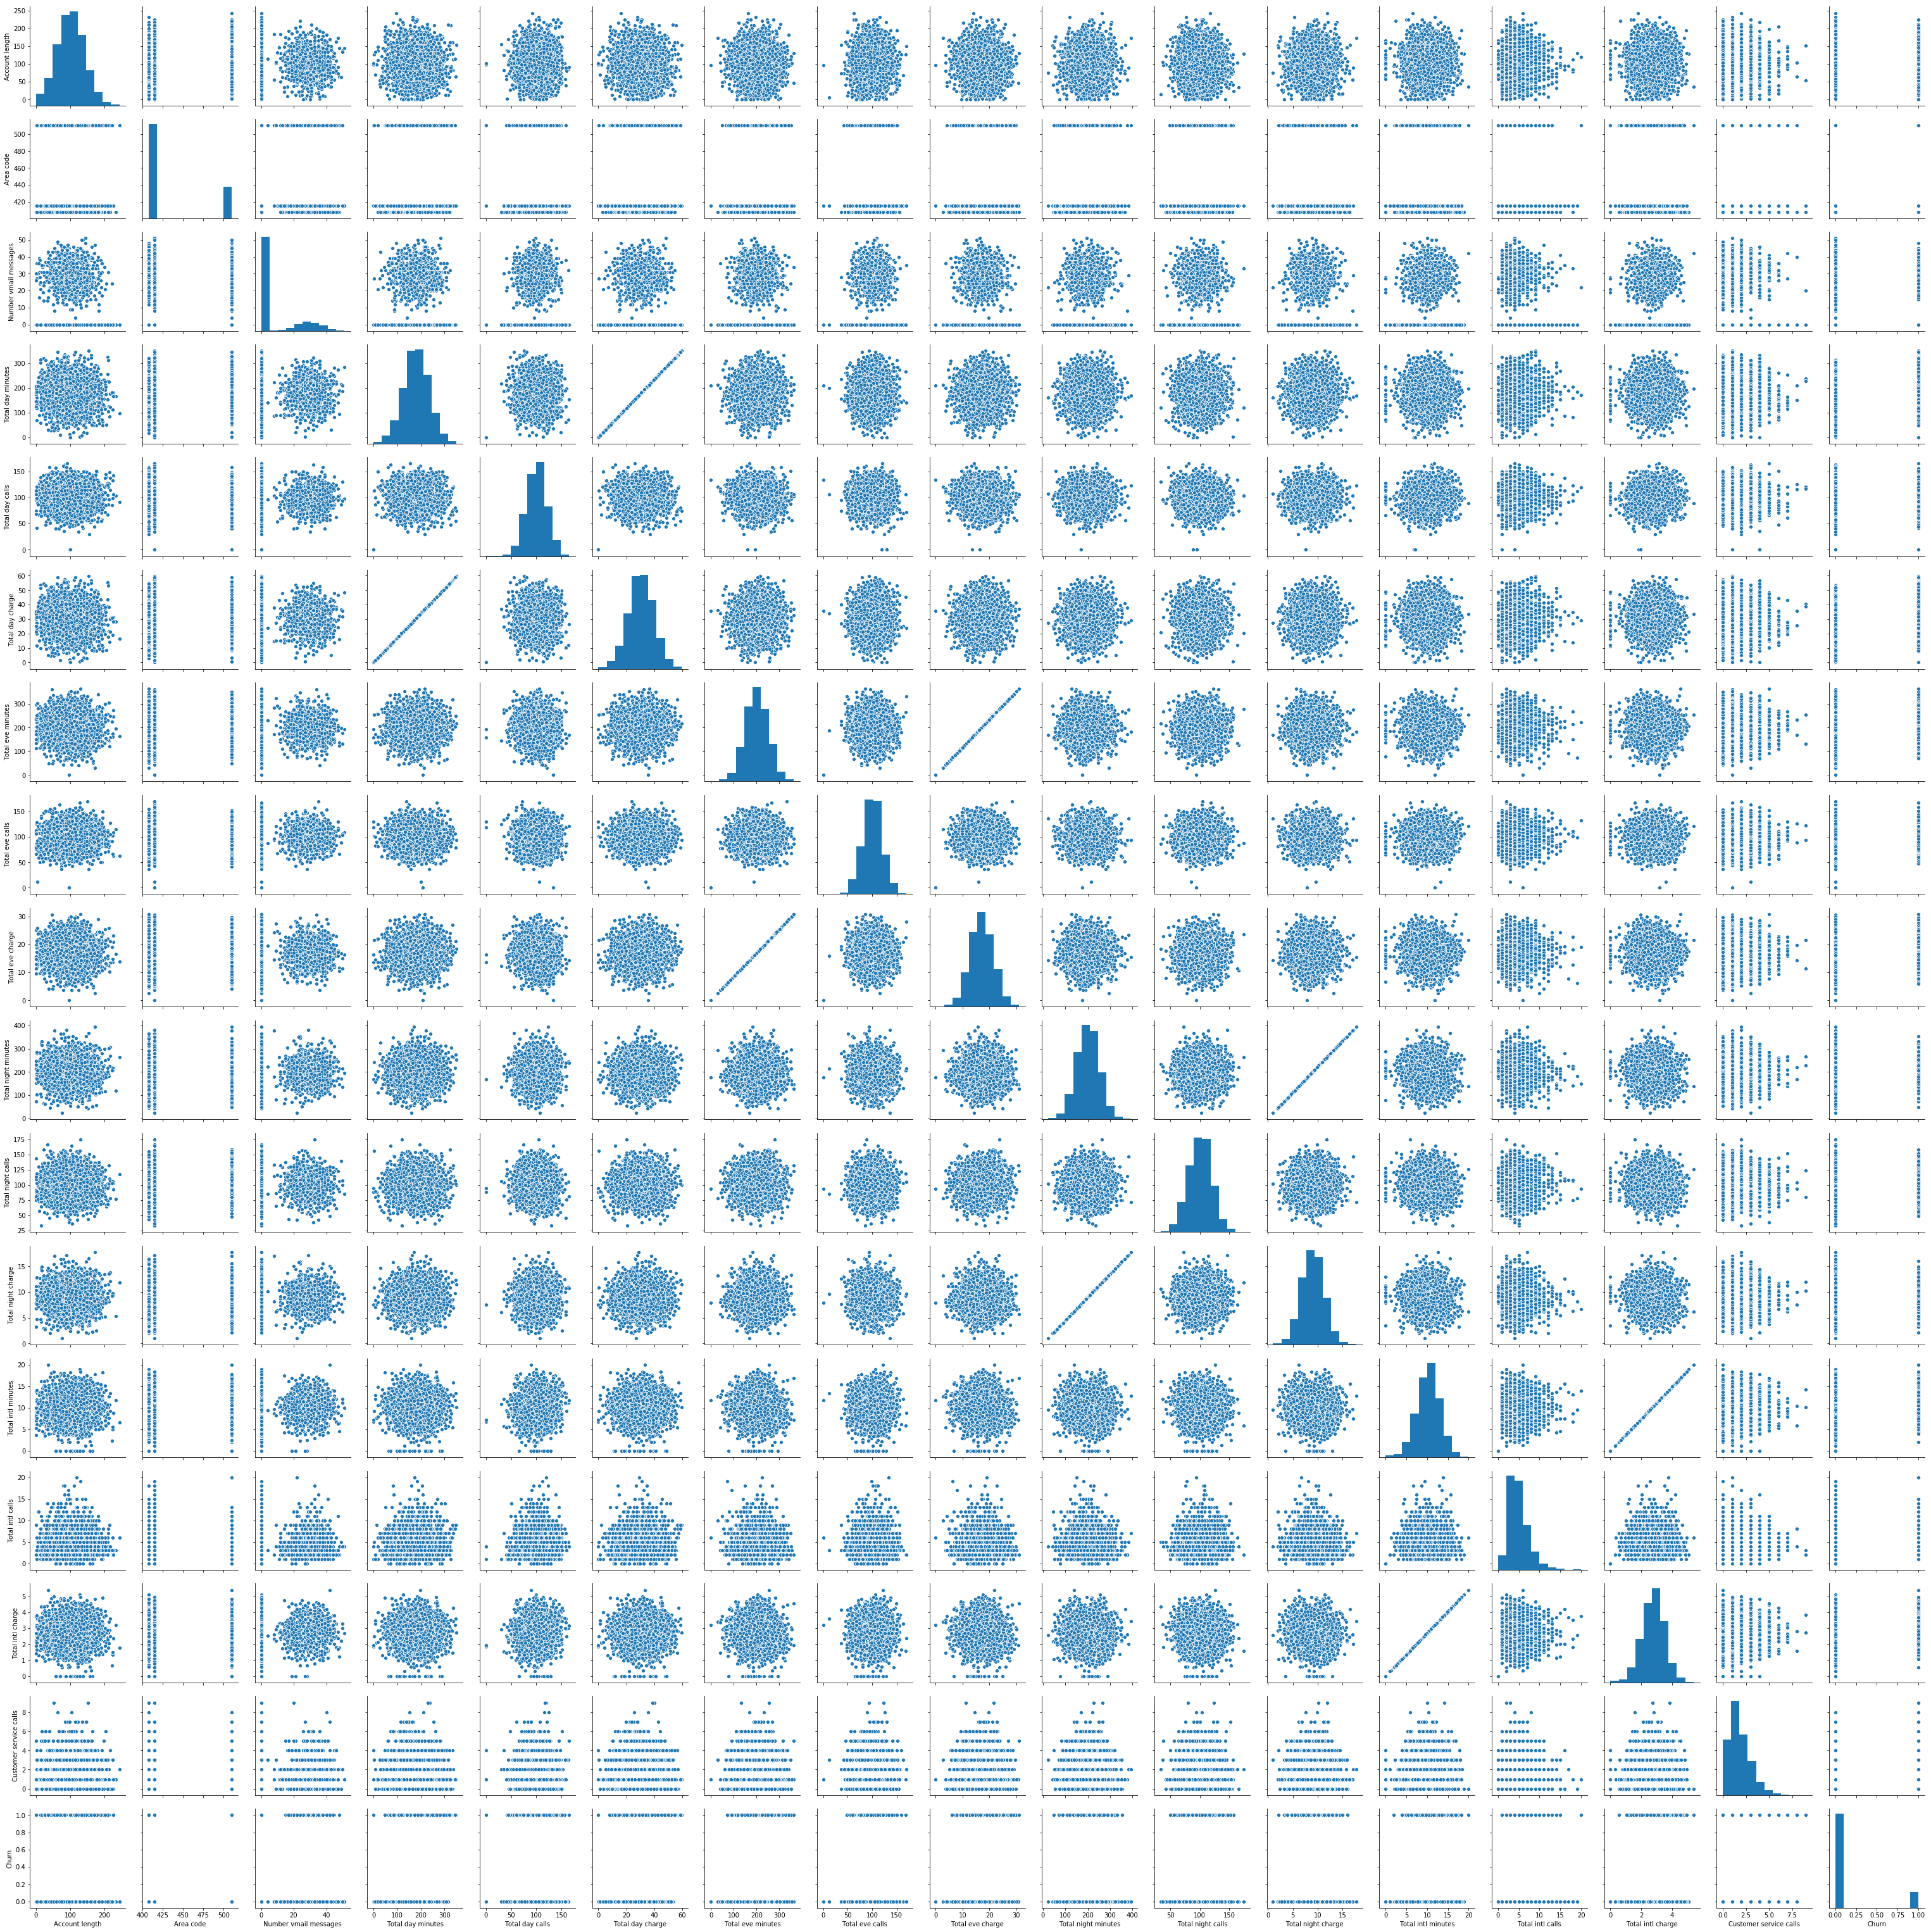

In [0]:
# Задание 2.2
sns.pairplot(data)

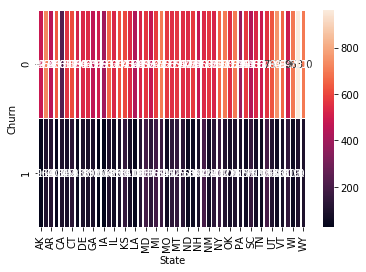

In [37]:
# Задание 2.3
tabl = data.pivot_table(index = 'Churn', 
                                      columns = 'State', 
                                      values = 'Total intl minutes', 
                                     aggfunc=sum).fillna(0).applymap(int)
sns.heatmap(tabl, annot=True, fmt=".1f", linewidths=.5)